# Service Disruptions

## Import Modules

In [608]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn import preprocessing
import re
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce

 ## Import Datasets
 - We import datasets

In [609]:
train = pd.read_csv('train.csv')
event_type = pd.read_csv('event_type.csv')
log_feature = pd.read_csv('log_feature.csv')
resource_type = pd.read_csv('resource_type.csv')
severity_type = pd.read_csv('severity_type.csv')

## EDA or Data Understanding 
- We are trying to understand our data

In [610]:
print ("Total number of rows", len(train))
print ("Number of unique 'id'= ", train['id'].nunique())
print ("Number of unique 'location' = ", train['location'].nunique())
print ("Number of unique 'fault_severity' = ", train['fault_severity'].nunique())

Total number of rows 7381
Number of unique 'id'=  7381
Number of unique 'location' =  929
Number of unique 'fault_severity' =  3


In [611]:
event_type.info(), resource_type.info(), log_feature.info(), severity_type.info(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          31170 non-null  int64 
 1   event_type  31170 non-null  object
dtypes: int64(1), object(1)
memory usage: 487.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21076 entries, 0 to 21075
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21076 non-null  int64 
 1   resource_type  21076 non-null  object
dtypes: int64(1), object(1)
memory usage: 329.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58671 entries, 0 to 58670
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           58671 non-null  int64 
 1   log_feature  58671 non-null  object
 2   volume       58671 non-null  int64 
dtypes: int64(2), object(1)
memory 

(None, None, None, None, None)

In [612]:
train.shape

(7381, 3)

In [613]:
train.head(5)

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


- Sorted by ID

In [614]:
train.sort_values('id', inplace = True)

In [615]:
train.tail()

,id,location,fault_severity
847,18539,location 147,0
3312,18542,location 495,0
7020,18543,location 998,1
4612,18548,location 278,0
1966,18550,location 12,0


In [616]:
train['id'].nunique(), event_type['id'].nunique(), log_feature['id'].nunique(), resource_type['id'].nunique(), severity_type['id'].nunique()

(7381, 18552, 18552, 18552, 18552)

## Data Merging
- We combine data

In [617]:
csv_list = [event_type,log_feature,resource_type,severity_type,train]

In [618]:
i = 2
temp = pd.merge(csv_list[0], csv_list[1], on = "id")
while i < len(csv_list):
    temp = pd.merge(temp, csv_list[i], on = "id")
    i += 1
df = temp

# or

# data = reduce(lambda left,right: pd.merge(left,right,on='id'), csv_list)

In [619]:
df

,id,event_type,log_feature,volume,resource_type,severity_type,location,fault_severity
0,8011,event_type 15,feature 68,7,resource_type 8,severity_type 2,location 1,0
1,2588,event_type 15,feature 82,9,resource_type 8,severity_type 1,location 1,0
2,2588,event_type 15,feature 201,5,resource_type 8,severity_type 1,location 1,0
3,2588,event_type 15,feature 80,15,resource_type 8,severity_type 1,location 1,0
4,2588,event_type 15,feature 203,5,resource_type 8,severity_type 1,location 1,0
...,...,...,...,...,...,...,...,...
61834,8114,event_type 11,feature 54,1,resource_type 8,severity_type 2,location 999,0
61835,8114,event_type 11,feature 87,3,resource_type 8,severity_type 2,location 999,0
61836,878,event_type 11,feature 62,1,resource_type 8,severity_type 2,location 999,0
61837,4464,event_type 11,feature 209,1,resource_type 8,severity_type 1,location 999,0


In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              61839 non-null  int64 
 1   event_type      61839 non-null  object
 2   log_feature     61839 non-null  object
 3   volume          61839 non-null  int64 
 4   resource_type   61839 non-null  object
 5   severity_type   61839 non-null  object
 6   location        61839 non-null  object
 7   fault_severity  61839 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.2+ MB


- Extracting string expressions from data

In [621]:
df.event_type = df.event_type.str.replace("[^0-9]", '') # or \D+
df.log_feature = df.log_feature.str.replace("[^0-9]", '')
df.resource_type = df.resource_type.str.replace("[^0-9]", '')
df.severity_type = df.severity_type.str.replace("[^0-9]", '')
df.location = df.location.str.replace("[^0-9]", '')

In [622]:
df

,id,event_type,log_feature,volume,resource_type,severity_type,location,fault_severity
0,8011,15,68,7,8,2,1,0
1,2588,15,82,9,8,1,1,0
2,2588,15,201,5,8,1,1,0
3,2588,15,80,15,8,1,1,0
4,2588,15,203,5,8,1,1,0
...,...,...,...,...,...,...,...,...
61834,8114,11,54,1,8,2,999,0
61835,8114,11,87,3,8,2,999,0
61836,878,11,62,1,8,2,999,0
61837,4464,11,209,1,8,1,999,0


In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              61839 non-null  int64 
 1   event_type      61839 non-null  object
 2   log_feature     61839 non-null  object
 3   volume          61839 non-null  int64 
 4   resource_type   61839 non-null  object
 5   severity_type   61839 non-null  object
 6   location        61839 non-null  object
 7   fault_severity  61839 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.2+ MB


- We accept fault severity as label and create x and y

In [624]:
x = df.drop("fault_severity", axis = 1)
y = train["fault_severity"]

In [625]:
x

,id,event_type,log_feature,volume,resource_type,severity_type,location
0,8011,15,68,7,8,2,1
1,2588,15,82,9,8,1,1
2,2588,15,201,5,8,1,1
3,2588,15,80,15,8,1,1
4,2588,15,203,5,8,1,1
...,...,...,...,...,...,...,...
61834,8114,11,54,1,8,2,999
61835,8114,11,87,3,8,2,999
61836,878,11,62,1,8,2,999
61837,4464,11,209,1,8,1,999


In [626]:
pd.DataFrame(y)

,fault_severity
4407,1
5694,0
279,1
4370,0
2199,0
...,...
847,0
3312,0
7020,1
4612,0


- we apply dummy variable to categorical data

In [627]:
x = pd.get_dummies(x, drop_first=True)

- We do groupby and reset index

In [628]:
x = x.groupby("id").mean()
x.reset_index(inplace=True)

In [629]:
x

,id,volume,event_type_10,event_type_11,event_type_12,event_type_13,event_type_14,event_type_15,event_type_18,event_type_19,...,location_987,location_989,location_99,location_990,location_991,location_994,location_995,location_996,location_998,location_999
0,1,1.666667,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,8.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,18539,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7377,18542,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7378,18543,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7379,18548,3.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split
- We separate the data we train and test

In [630]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

## Modeling
- We are doing our modelling. I used 2 classification types

In [631]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [632]:
gbc = GradientBoostingClassifier()
gbcmodel = gbc.fit(x_train,y_train)

rf = RandomForestClassifier()
rfmodel = rf.fit(x_train, y_train)

## Predicting
- We make predictions and measure our success rate

[[862  58  40]
 [212 124  30]
 [ 30  25  96]]


0.7325660121868652

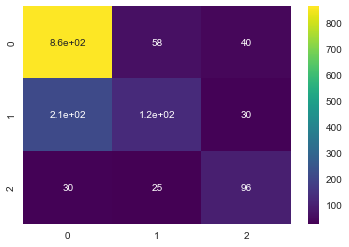

In [633]:
y_pred_gbc = gbcmodel.predict(x_test)
print(confusion_matrix(y_test, y_pred_gbc))
sns.heatmap(confusion_matrix(y_test, y_pred_gbc), cmap = "viridis", annot = True)
accuracy_score(y_test, y_pred_gbc)

[[852  78  30]
 [188 156  22]
 [ 53  35  63]]


0.7251184834123223

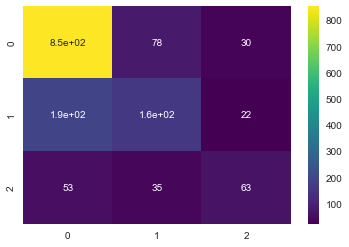

In [634]:
y_pred_rf = rfmodel.predict(x_test)
print(confusion_matrix(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), cmap = "viridis", annot = True)
accuracy_score(y_test, y_pred_rf)

In [635]:
y_pred_proba_gbc = gbcmodel.predict_proba(x_test)

y_pred_proba_rf = rfmodel.predict_proba(x_test)

In [636]:
x_test.columns

Index(['id', 'volume', 'event_type_10', 'event_type_11', 'event_type_12',
       'event_type_13', 'event_type_14', 'event_type_15', 'event_type_18',
       'event_type_19',
       ...
       'location_987', 'location_989', 'location_99', 'location_990',
       'location_991', 'location_994', 'location_995', 'location_996',
       'location_998', 'location_999'],
      dtype='object', length=1321)

In [637]:
result = pd.DataFrame({
        "id": x_test.id,
        "Predicted fault_severity": y_pred_gbc,
        "prediction_probability_0": y_pred_proba_gbc[:,0],
        "prediction_probability_1": y_pred_proba_gbc[:,1],
        "prediction_probability_2": y_pred_proba_gbc[:,2]
    },columns=['id','Predicted fault_severity','prediction_probability_0','prediction_probability_1','prediction_probability_2'])

result.head()

,id,Predicted fault_severity,prediction_probability_0,prediction_probability_1,prediction_probability_2
1103,2803,0,0.915399,0.076824,0.007777
2338,5880,0,0.900637,0.087287,0.012076
7201,18101,0,0.947297,0.041419,0.011284
4013,10013,1,0.405895,0.569531,0.024574
2684,6732,1,0.294139,0.658182,0.047679


In [638]:
result.to_csv('service-disruption-prediction.csv')